In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv('../data/population_Final.csv', encoding='EUC-KR')

In [3]:
pop.head()

,행정구역,인구수
0,전체,51349072
1,서울,9577030
2,부산,3385964
3,대구,2927925
4,인천,2428301


## 지역별 교육 시각화

In [4]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [5]:
scl = pd.read_excel('../data/교육_최종.xlsx',encoding='EUC-KR')

In [6]:
scl

,지역,고등학교,중학교,초등학교,합계
0,광주,67,90,154,311
1,대구,93,125,229,447
2,대전,62,88,148,298
3,부산,143,174,305,622
4,서울,320,385,603,1308
5,울산,57,63,117,237
6,인천,125,134,249,508
7,전체,867,1059,1805,3731


In [7]:
scl = scl.rename(columns={'지역' : '행정구역'})

In [8]:
scl = pd.merge(scl,pop, on= '행정구역')

In [9]:
scl

,행정구역,고등학교,중학교,초등학교,합계,인구수
0,광주,67,90,154,311,1469981
1,대구,93,125,229,447,2927925
2,대전,62,88,148,298,1450439
3,부산,143,174,305,622,3385964
4,서울,320,385,603,1308,9577030
5,울산,57,63,117,237,1144299
6,인천,125,134,249,508,2428301
7,전체,867,1059,1805,3731,51349072


In [10]:
scl = scl.drop(7, axis=0)

In [11]:
# 전체 고등학교 지역 분포
scl['지역 고등학교 비율'] = scl['고등학교'] / scl['고등학교'].sum() * 100
scl

,행정구역,고등학교,중학교,초등학교,합계,인구수,지역 고등학교 비율
0,광주,67,90,154,311,1469981,7.727797
1,대구,93,125,229,447,2927925,10.726644
2,대전,62,88,148,298,1450439,7.151096
3,부산,143,174,305,622,3385964,16.493656
4,서울,320,385,603,1308,9577030,36.908881
5,울산,57,63,117,237,1144299,6.574394
6,인천,125,134,249,508,2428301,14.417532


In [12]:
scl['지역 중학교 비율'] = scl['중학교'] / scl['중학교'].sum() * 100

In [13]:
scl['지역 초등학교 비율'] = scl['초등학교'] / scl['초등학교'].sum() * 100

In [14]:
# 주요도시 평균인구 대비 고등학교 수
scl['인구대비고등학교수'] = scl['고등학교'] / scl['인구수'].mean() * 100
scl

,행정구역,고등학교,중학교,초등학교,합계,인구수,지역 고등학교 비율,지역 중학교 비율,지역 초등학교 비율,인구대비고등학교수
0,광주,67,90,154,311,1469981,7.727797,8.498584,8.531856,0.002095
1,대구,93,125,229,447,2927925,10.726644,11.803588,12.686981,0.002908
2,대전,62,88,148,298,1450439,7.151096,8.309726,8.199446,0.001939
3,부산,143,174,305,622,3385964,16.493656,16.430595,16.897507,0.004472
4,서울,320,385,603,1308,9577030,36.908881,36.355052,33.407202,0.010007
5,울산,57,63,117,237,1144299,6.574394,5.949008,6.481994,0.001783
6,인천,125,134,249,508,2428301,14.417532,12.653447,13.795014,0.003909


In [15]:
# 주요도시 평균인구 대비 중학교 수
scl['인구대비중학교수'] = scl['중학교'] / scl['인구수'].mean() * 100

In [16]:
# 주요도시 평균인구 대비 초등학교 수
scl['인구대비초등학교수'] = scl['초등학교'] / scl['인구수'].mean() * 100

## 학교비율 시각화

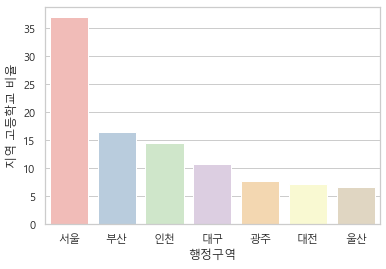

In [25]:
# 전체에서 고등학교가 차지하는 비율

sns.barplot(x= '행정구역', y ='지역 고등학교 비율', data=scl.sort_values('지역 고등학교 비율',ascending=False),palette='Pastel1')
plt.title = '고등학교비율'
plt.show()

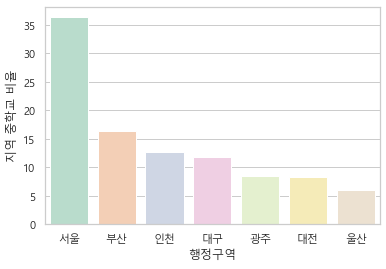

In [26]:
#전체에서 중학교가 차지하는 비율
sns.barplot(x= '행정구역', y ='지역 중학교 비율', data=scl.sort_values('지역 중학교 비율',ascending=False),palette='Pastel2')
plt.show()

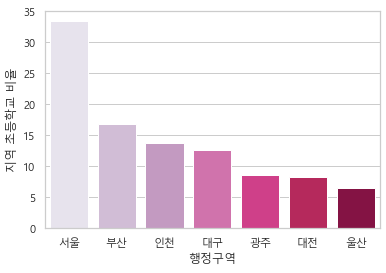

In [27]:
#전체에서 초등학교가 차지하는 비율
sns.barplot(x= '행정구역', y ='지역 초등학교 비율', data=scl.sort_values('지역 초등학교 비율',ascending=False),palette='PuRd')
plt.show()

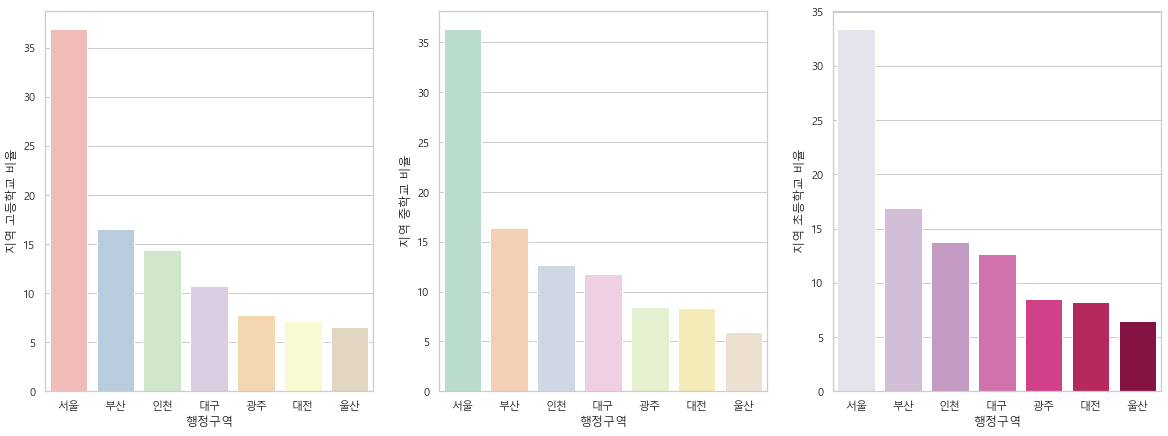

In [30]:
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(131)
sns.barplot(x= '행정구역', y ='지역 고등학교 비율', data=scl.sort_values('지역 고등학교 비율',ascending=False),palette='Pastel1')

plt.subplot(132)
sns.barplot(x= '행정구역', y ='지역 중학교 비율', data=scl.sort_values('지역 중학교 비율',ascending=False),palette='Pastel2')

plt.subplot(133)
sns.barplot(x= '행정구역', y ='지역 초등학교 비율', data=scl.sort_values('지역 초등학교 비율',ascending=False),palette='PuRd')

plt.show()

## 평균인구 대비 교육 인프라 시각화

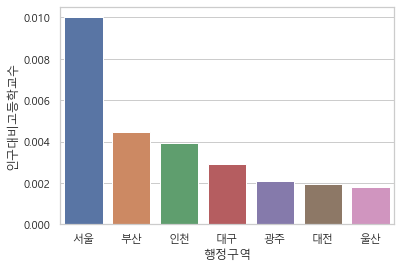

In [61]:
# 평균 인구 대비 고등교육 인프라 차이

sns.barplot(x= '행정구역', y ='인구대비고등학교수', data=scl.sort_values('인구대비고등학교수',ascending=False))
plt.show()

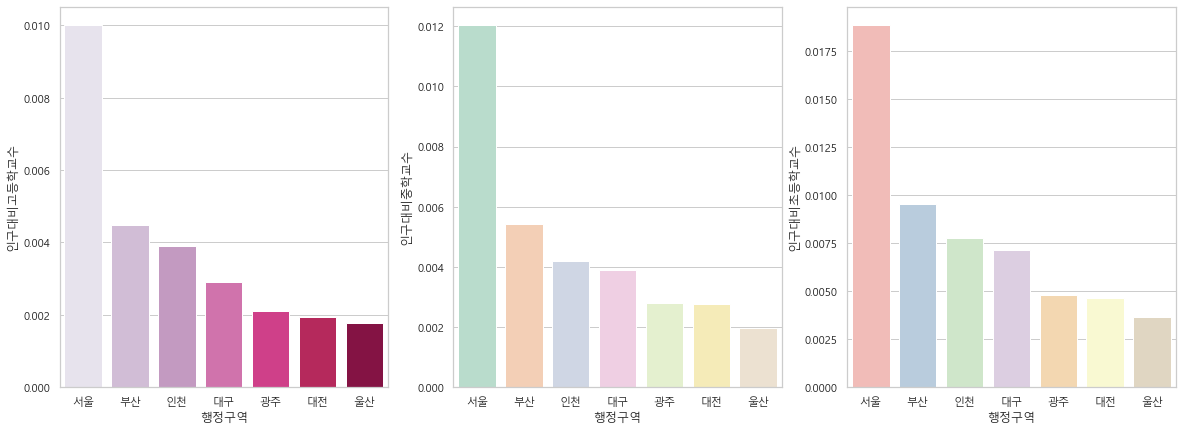

In [31]:
plt.rcParams["figure.figsize"] = (20,7)

plt.subplot(131)
sns.barplot(x= '행정구역', y ='인구대비고등학교수', data=scl.sort_values('인구대비고등학교수',ascending=False),palette='PuRd')

plt.subplot(132)
sns.barplot(x= '행정구역', y ='인구대비중학교수', data=scl.sort_values('인구대비중학교수',ascending=False),palette='Pastel2')

plt.subplot(133)
sns.barplot(x= '행정구역', y ='인구대비초등학교수', data=scl.sort_values('인구대비초등학교수',ascending=False),palette='Pastel1')

plt.show()

In [103]:
scl.to_csv('EDU_LOOK.csv',encoding='EUC-KR')